#### Data source:- https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("churn.csv")

In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
data_new = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [16]:
data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data_new['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

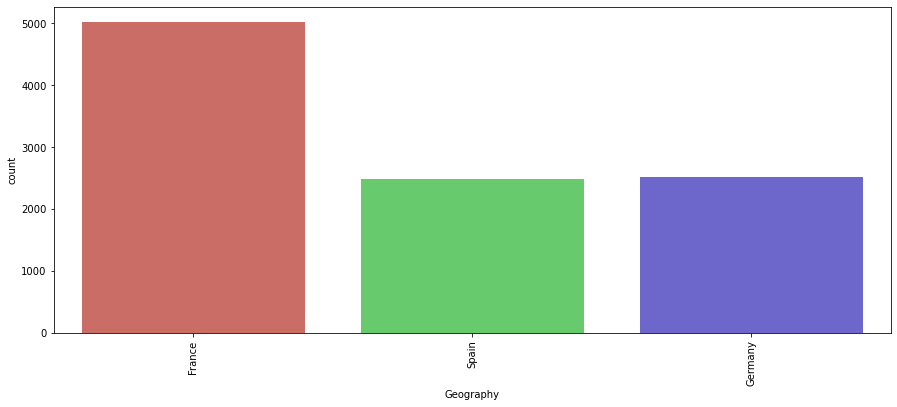

In [18]:
plt.figure(figsize=(15,6))
sns.countplot('Geography', data = data_new, palette='hls')
plt.xticks(rotation = 90)
plt.show()


In [20]:
!pip3 install plotly

In [22]:
import plotly.express as px
fig1 = px.histogram(data_new, x = 'Geography', color = 'Geography')
fig1.show()

In [23]:
data_new['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

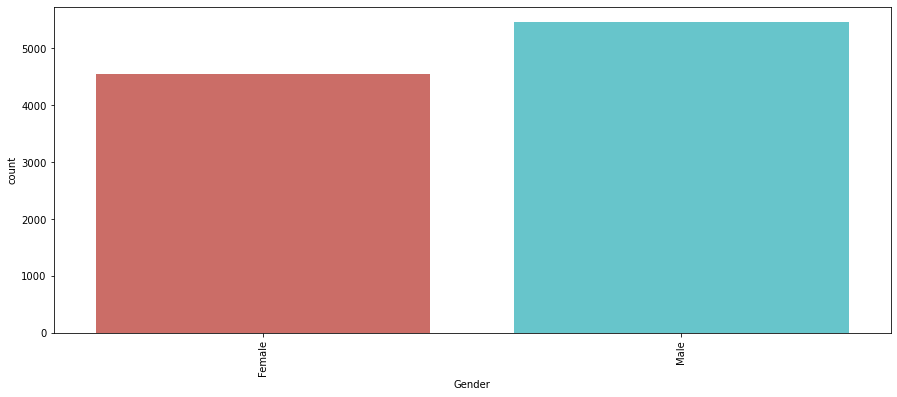

In [24]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', data = data_new, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [25]:
fig2 = px.histogram(data_new, x = 'Gender', color = 'Gender')
fig2.show()

In [26]:
data_new['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

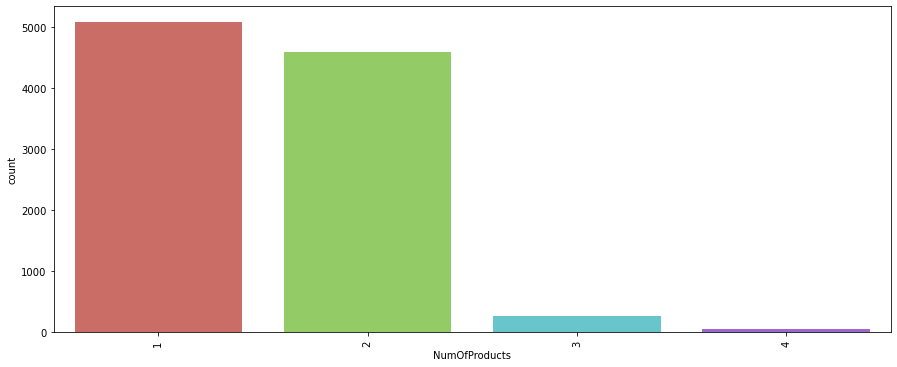

In [27]:
plt.figure(figsize=(15,6))
sns.countplot('NumOfProducts', data = data_new,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [28]:
fig3 = px.histogram(data_new, x = 'NumOfProducts', color = 'NumOfProducts')
fig3.show()

In [29]:
data_new['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [30]:
fig4 = px.histogram(data_new, x = 'HasCrCard', color = 'HasCrCard')
fig4.show()

In [31]:
data_new['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [32]:
fig5 = px.histogram(data_new, x = 'IsActiveMember', color = 'IsActiveMember')
fig5.show()

In [33]:
data_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [34]:
fig6 = px.histogram(data_new, x = 'Exited', color = 'Exited')
fig6.show()

In [35]:
values = data_new['Exited'].value_counts()
names = ['Retained', 'Exited']
fig7 = px.pie(values = values, names = names)
fig7.show()

In [36]:
data_new_numeric = data_new[['CreditScore', 'Age', 'Tenure', 'Balance',
'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
'Exited']]

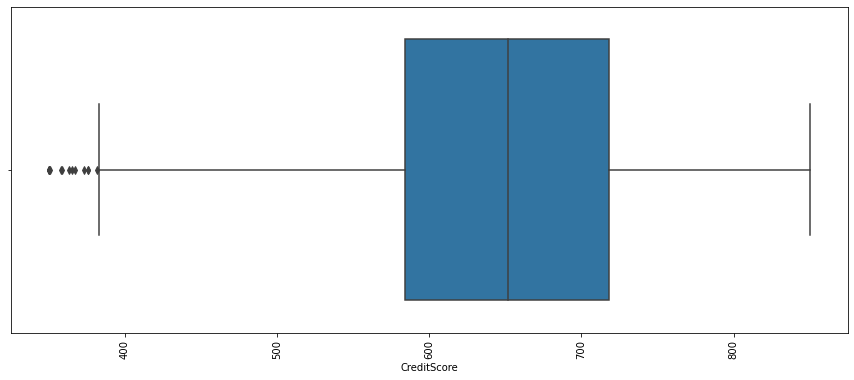

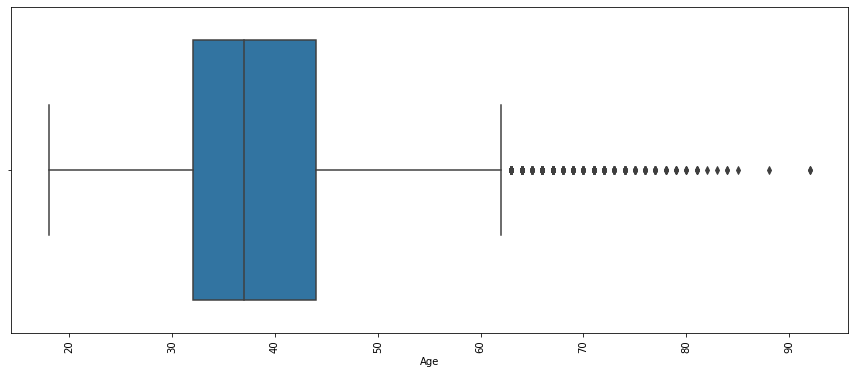

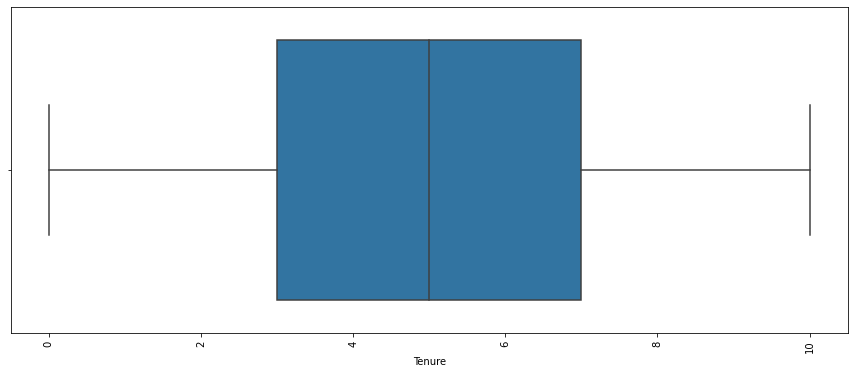

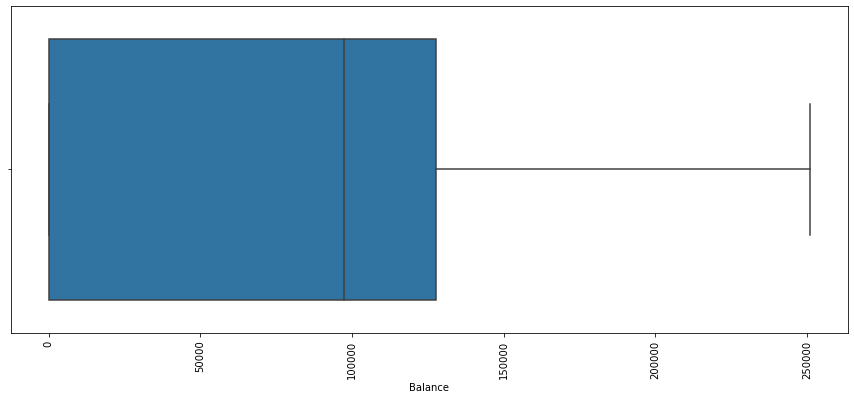

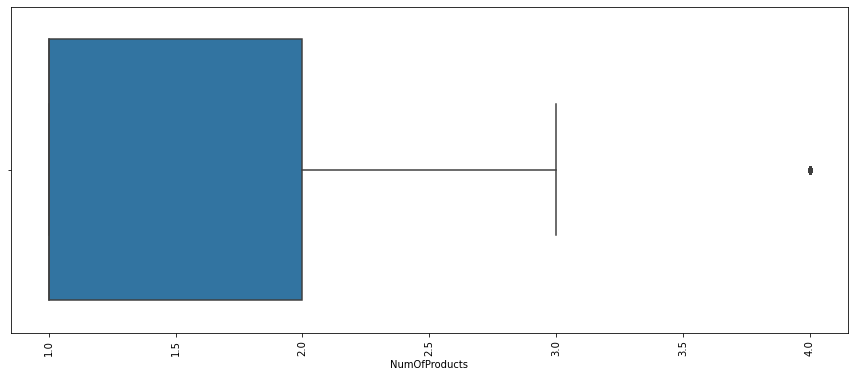

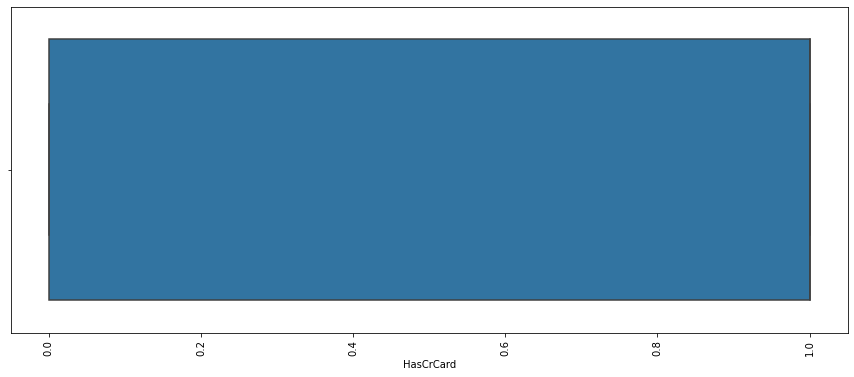

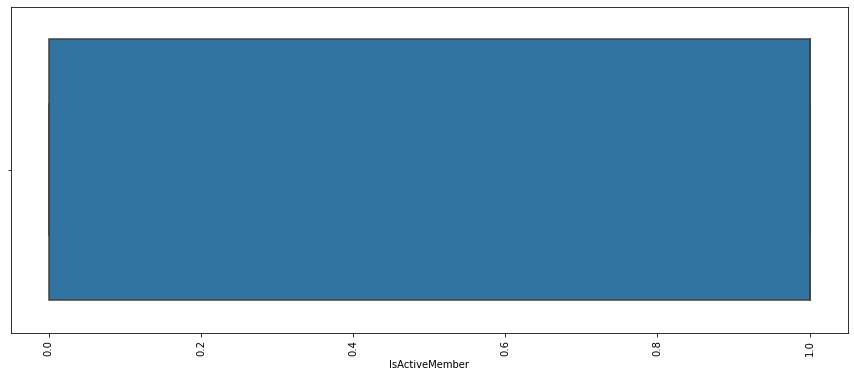

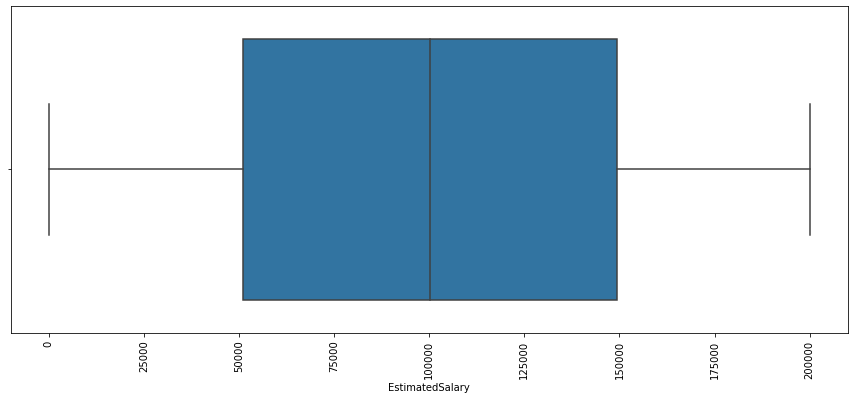

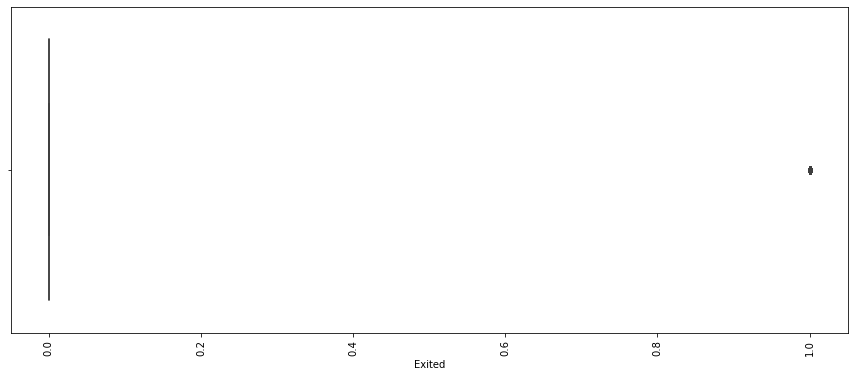

In [37]:
for i in data_new_numeric.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data_new_numeric[i], data = data_new_numeric)
    plt.xticks(rotation = 90)
    plt.show()

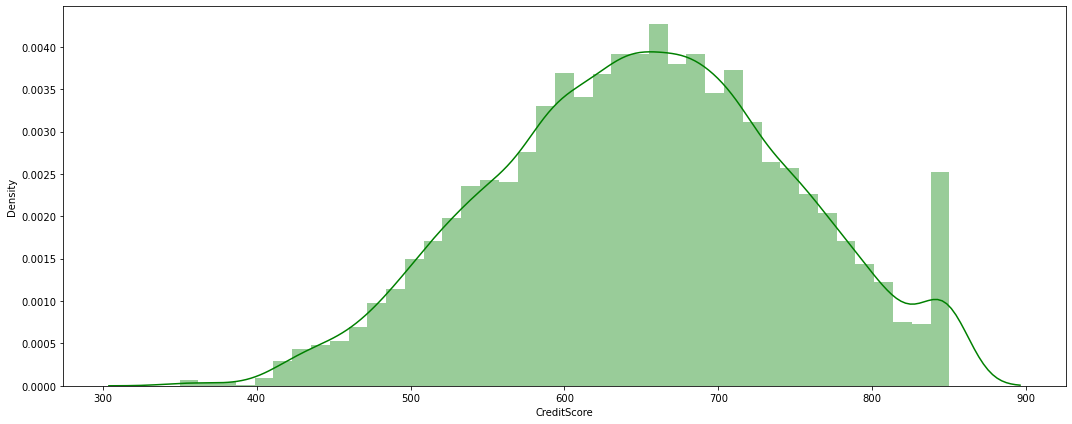

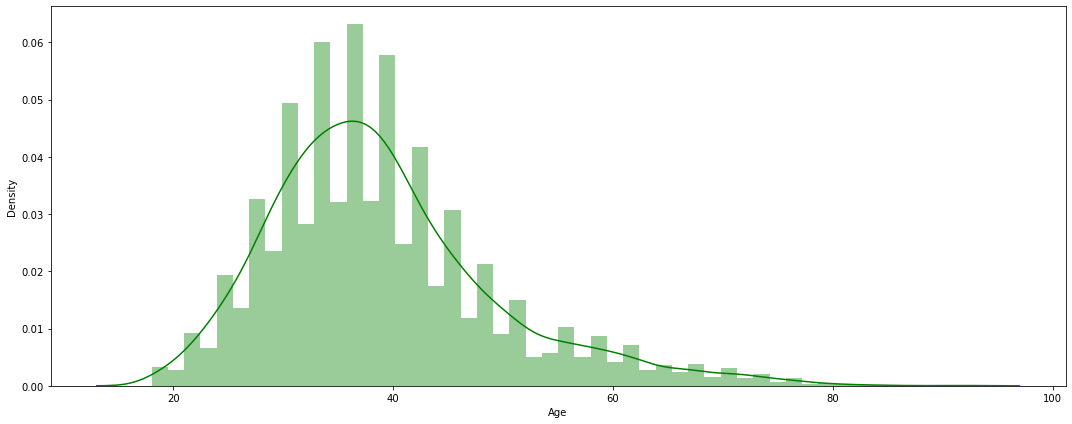

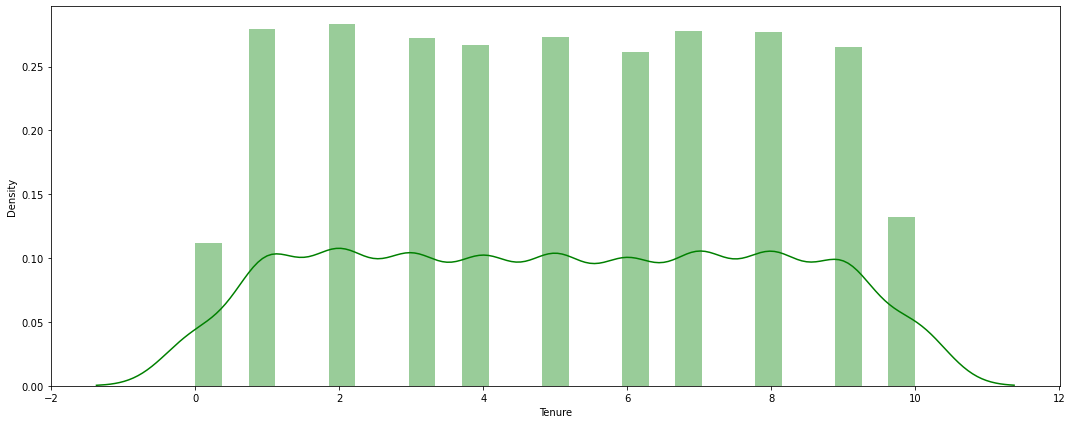

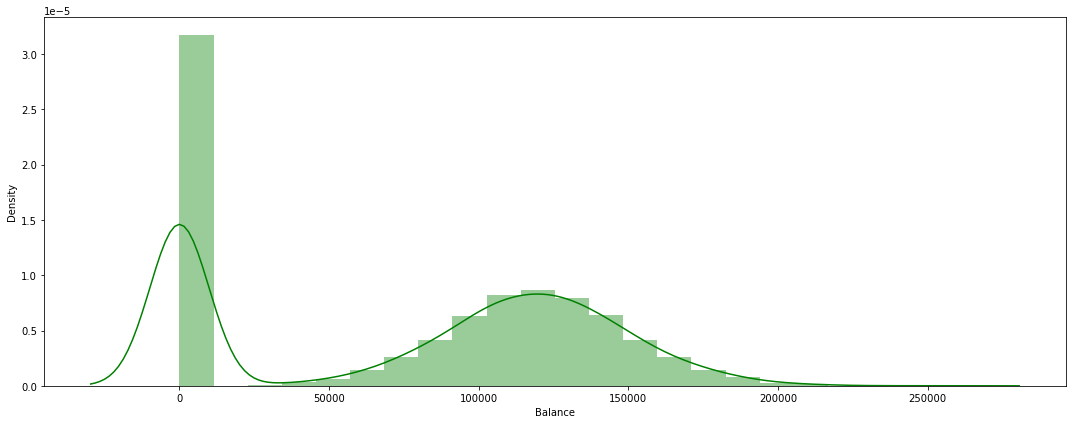

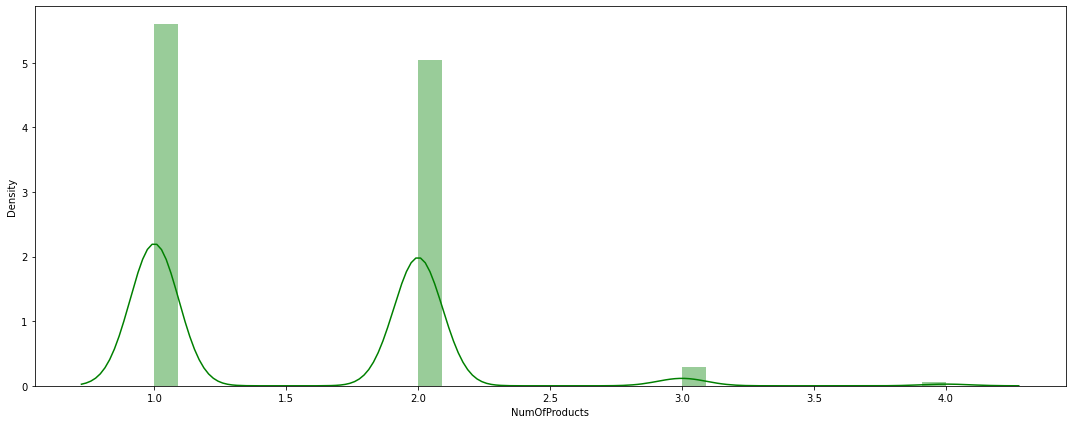

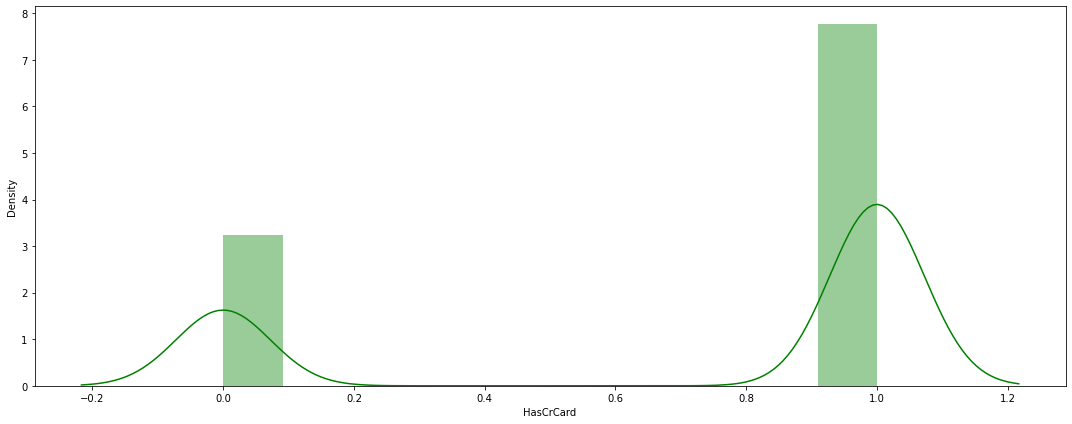

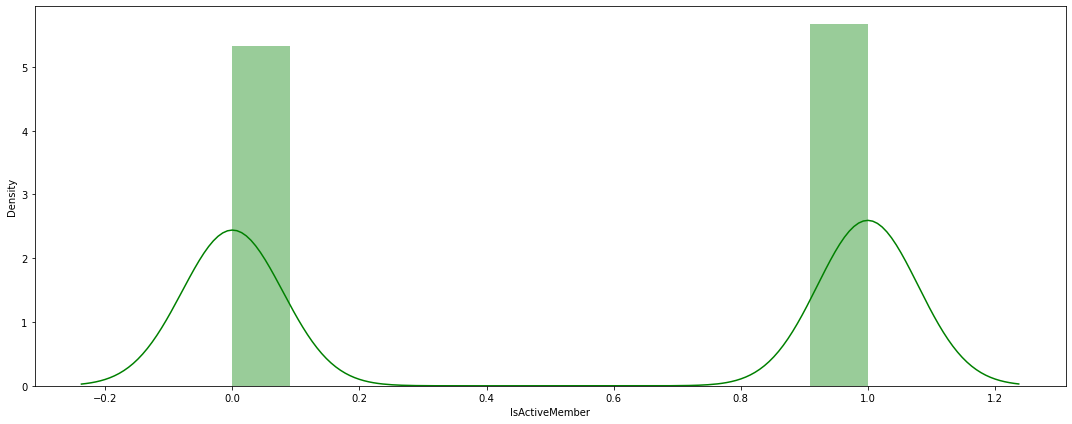

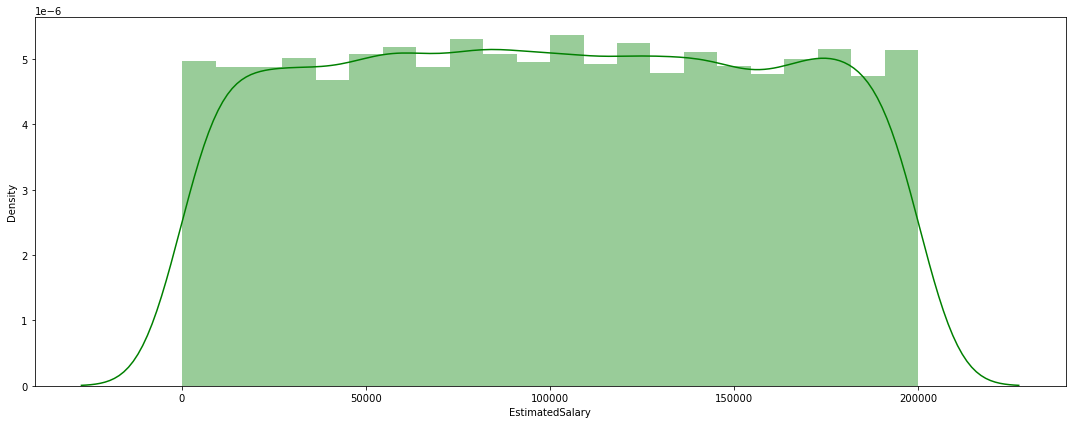

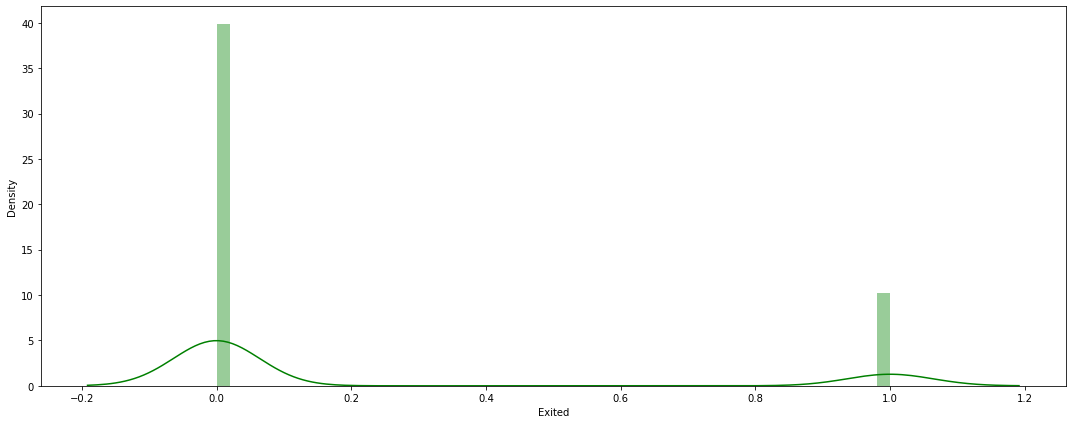

In [38]:
for i in data_new_numeric.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(data_new_numeric[i], color='green')
    plt.tight_layout()


In [39]:
data_exited = data_new.drop(columns = 'Exited')

In [40]:
data_exited.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [41]:
data_exited.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


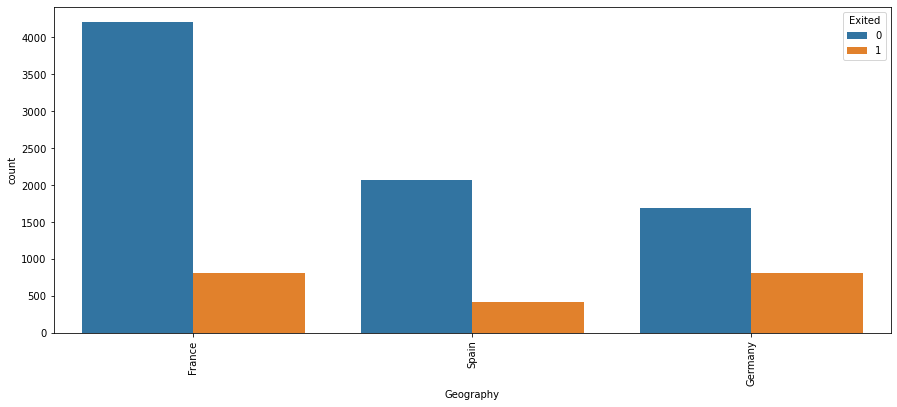

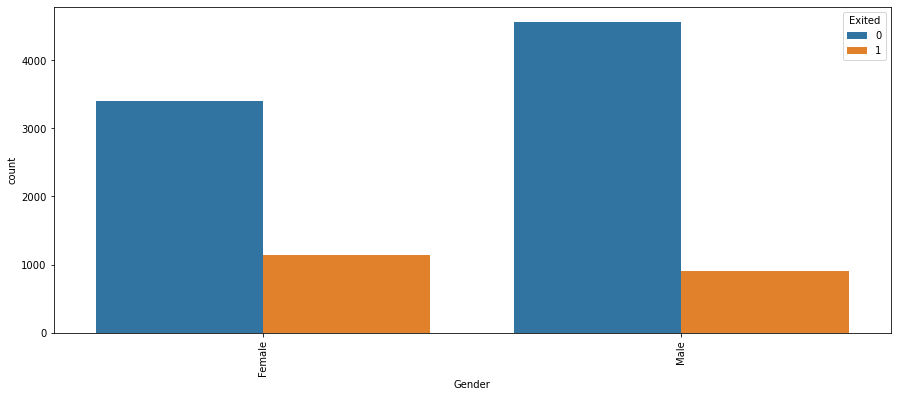

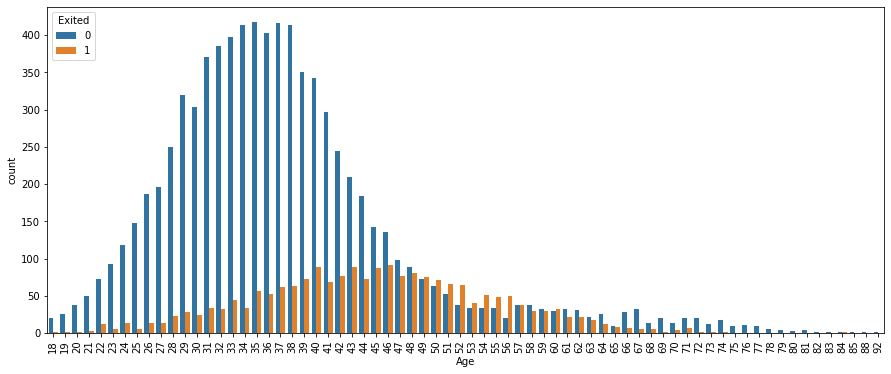

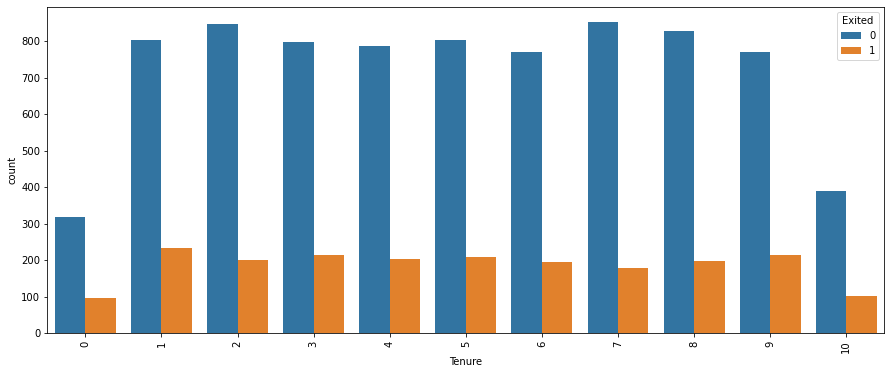

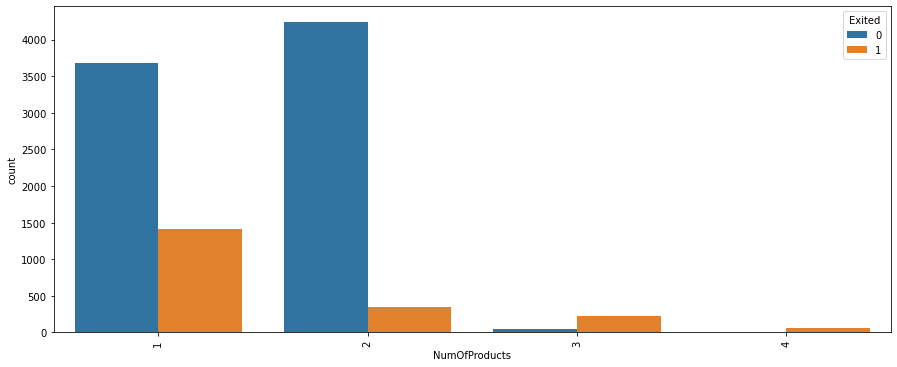

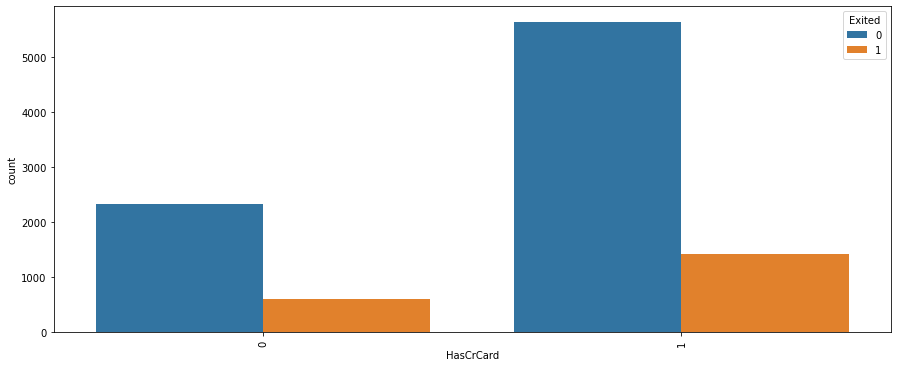

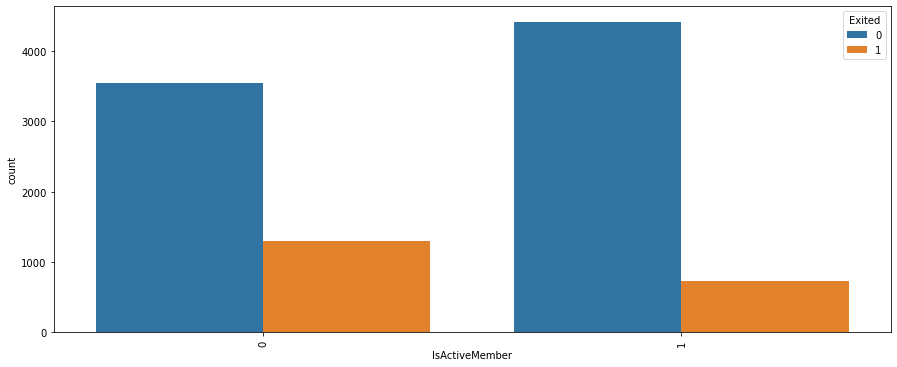

In [42]:
for i in data_exited[['Geography', 'Gender', 'Age', 'Tenure',
'NumOfProducts', 'HasCrCard', 'IsActiveMember']]:
    plt.figure(figsize=(15,6))
    sns.countplot(data_exited[i], hue = 'Exited' ,    data = data_new_numeric)
    plt.xticks(rotation = 90)
    plt.show()

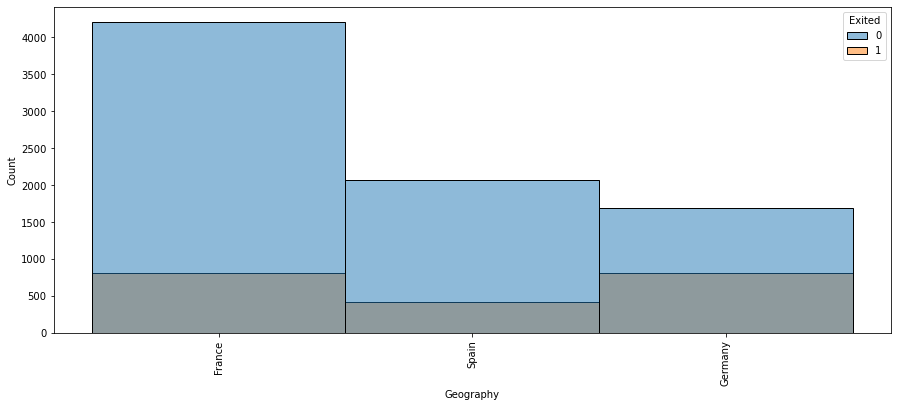

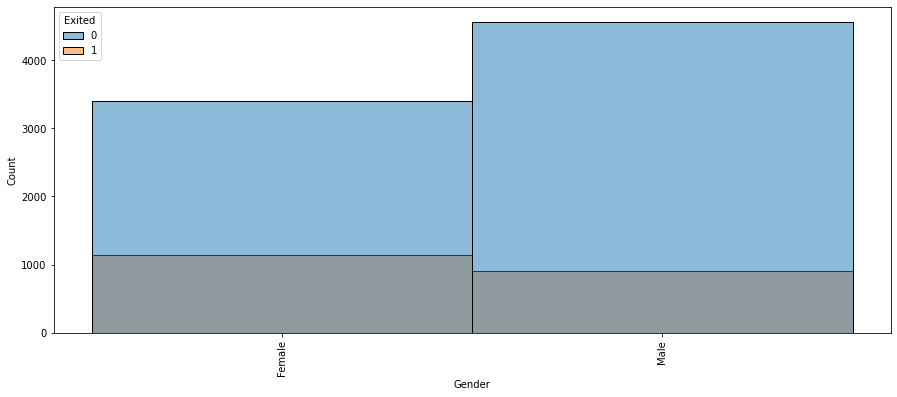

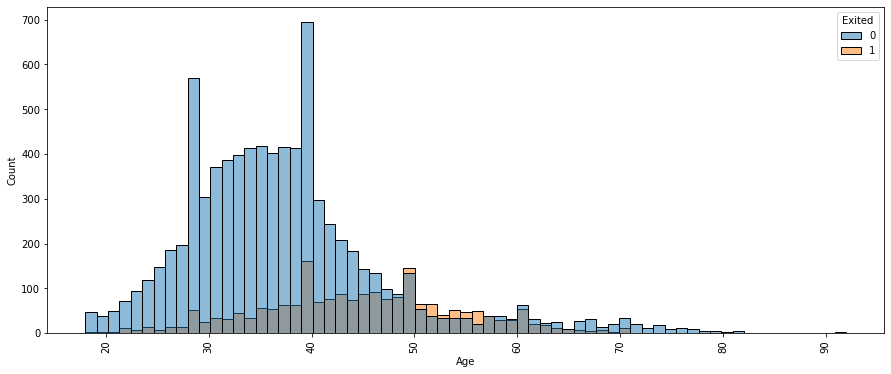

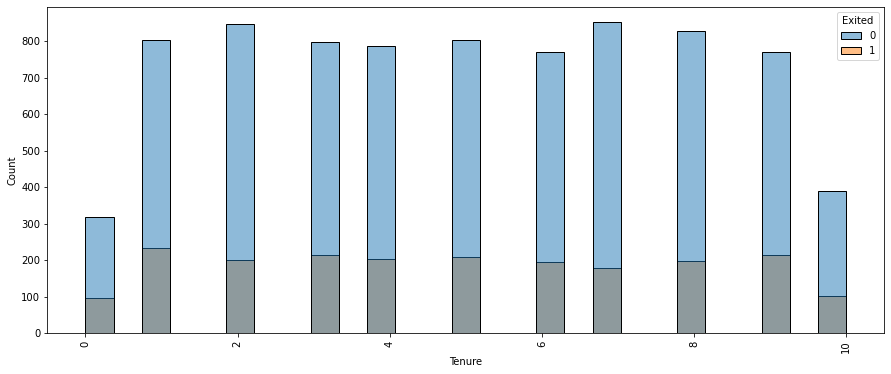

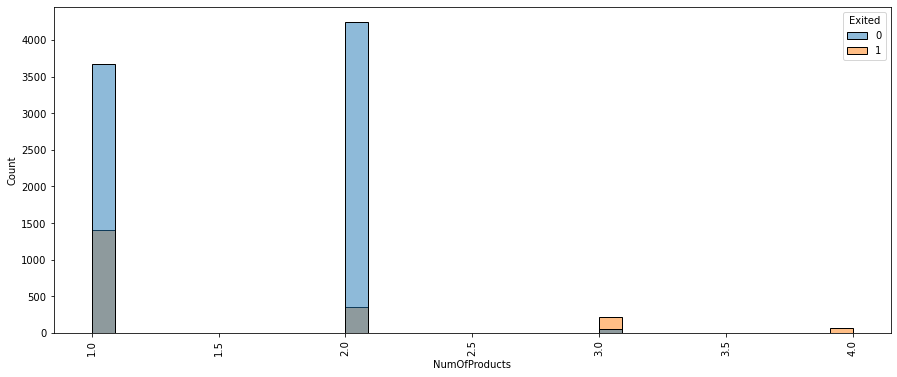

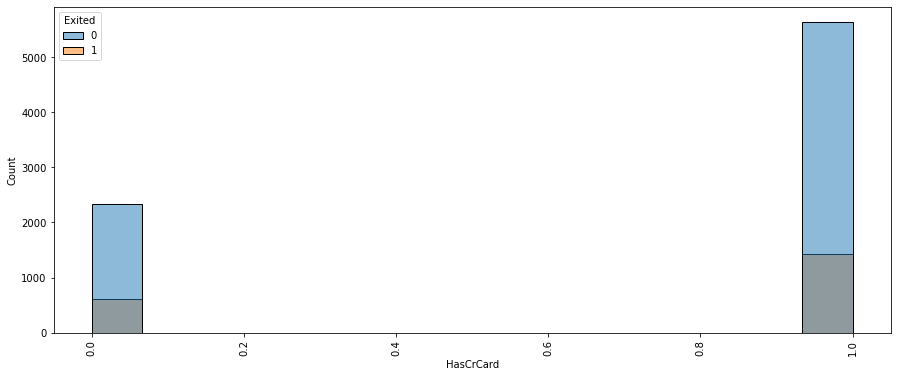

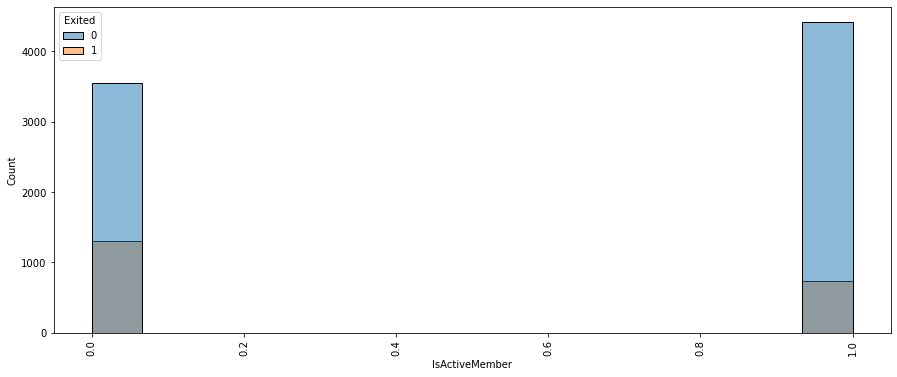

In [44]:
for i in data_exited[['Geography', 'Gender', 'Age', 'Tenure',
'NumOfProducts', 'HasCrCard', 'IsActiveMember']]:
    plt.figure(figsize=(15,6))
    sns.histplot(data_new_numeric, x = data_exited[i], hue = 'Exited')
    plt.xticks(rotation = 90)
    plt.show()

In [46]:
data_new_numeric.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


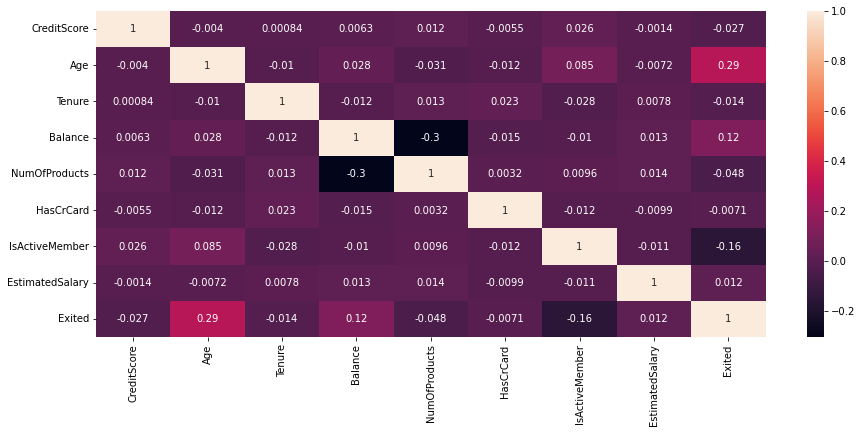

In [47]:
plt.figure(figsize=(15,6))
sns.heatmap(data_new_numeric.corr(), annot = True)
plt.show()

In [49]:
data_new['age_groups'] = pd.cut(data_new['Age'], bins=6)


0       (30.333, 42.667]
1       (30.333, 42.667]
2       (30.333, 42.667]
3       (30.333, 42.667]
4         (42.667, 55.0]
              ...       
9995    (30.333, 42.667]
9996    (30.333, 42.667]
9997    (30.333, 42.667]
9998    (30.333, 42.667]
9999    (17.926, 30.333]
Name: age_groups, Length: 10000, dtype: category
Categories (6, interval[float64, right]): [(17.926, 30.333] < (30.333, 42.667] < (42.667, 55.0] < (55.0, 67.333] < (67.333, 79.667] < (79.667, 92.0]]

In [57]:
data_new_age = data_new.copy()

In [58]:
data_new_age = data_new_age.groupby(['age_groups','Exited']).agg({'Gender' : 'count'}).reset_index()
data_new_age.columns = ['age_groups','Exited','user_count']
data_new_age['Exited'] = data_new_age['Exited'].apply(lambda x : 'Exited' if x == 1 else "Retained")

In [59]:
data_new_age

,age_groups,Exited,user_count
0,"(17.926, 30.333]",Retained,1820
1,"(17.926, 30.333]",Exited,148
2,"(30.333, 42.667]",Retained,4454
3,"(30.333, 42.667]",Exited,684
4,"(42.667, 55.0]",Retained,1183
5,"(42.667, 55.0]",Exited,911
6,"(55.0, 67.333]",Retained,337
7,"(55.0, 67.333]",Exited,271
8,"(67.333, 79.667]",Retained,155
9,"(67.333, 79.667]",Exited,22


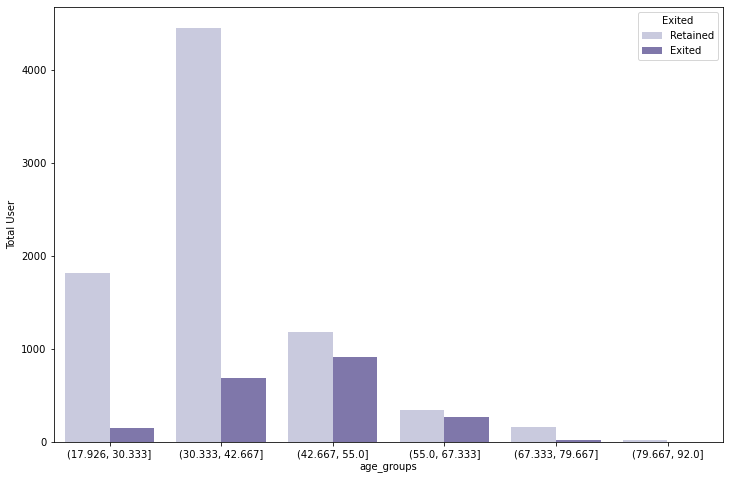

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(data = data_new_age, x = 'age_groups', y = 'user_count',
hue = 'Exited', palette = 'Purples')
plt.ylabel('Total User')
plt.show()

In [70]:
data_new_geo = data_new.groupby(['Geography','Exited']).agg({'Gender':'count'}).reset_index()
data_new_geo.columns = ['Geography','Exited','user_count']
data_new_geo

,Geography,Exited,user_count
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


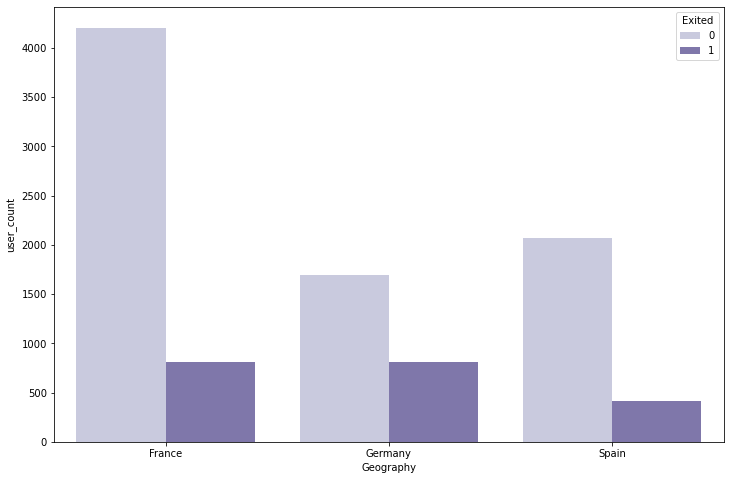

In [71]:
plt.figure(figsize=(12,8))
sns.barplot(data = data_new_geo, x = 'Geography',y='user_count',hue='Exited',palette = 'Purples')
plt.show()

In [102]:
data_new_product = data_new.groupby(['NumOfProducts','Exited']).agg({'Gender' : 'count'}).reset_index() #.stack(level=0)
print(data_new_product)

   NumOfProducts  Exited  Gender
0              1       0    3675
1              1       1    1409
2              2       0    4242
3              2       1     348
4              3       0      46
5              3       1     220
6              4       1      60


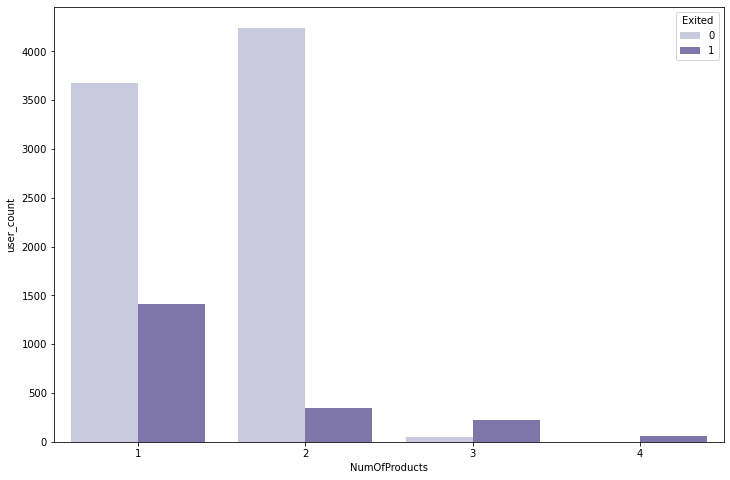

In [104]:
plt.figure(figsize=(12,8))
sns.barplot(data = data_new_product, x = 'NumOfProducts',y='user_count',hue='Exited',palette = 'Purples')
plt.show()

In [105]:
data_new['CreditScoreNew'] = pd.cut(data_new['CreditScore'], bins=6)

In [106]:
data_new_creditscore = data_new.groupby(['CreditScoreNew','Exited']).agg({'Gender' : 'count'}).reset_index()
data_new_creditscore.columns = ['CreditScoreNew','Exited','user_count']
data_new_creditscore

,CreditScoreNew,Exited,user_count
0,"(349.5, 433.333]",0,67
1,"(349.5, 433.333]",1,40
2,"(433.333, 516.667]",0,640
3,"(433.333, 516.667]",1,162
4,"(516.667, 600.0]",0,1694
5,"(516.667, 600.0]",1,463
6,"(600.0, 683.333]",0,2560
7,"(600.0, 683.333]",1,633
8,"(683.333, 766.667]",0,2013
9,"(683.333, 766.667]",1,496


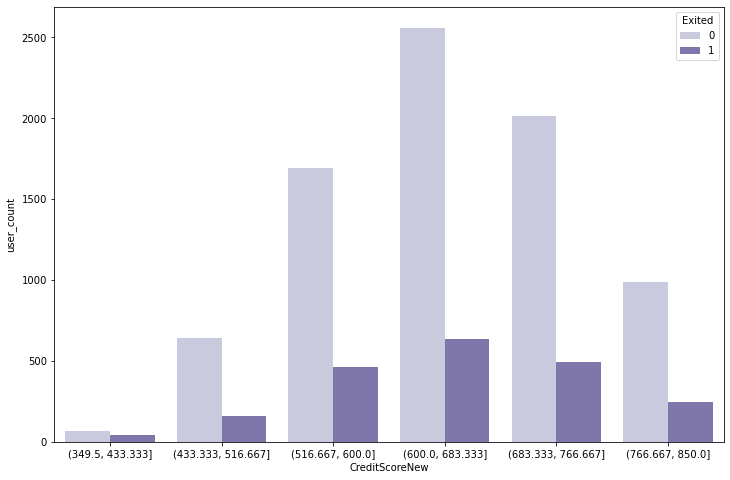

In [107]:
plt.figure(figsize=(12,8))
sns.barplot(data = data_new_creditscore, x = 'CreditScoreNew',y='user_count',hue='Exited',palette = 'Purples')
plt.show()